In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot  as plt
import seaborn as sns
import math

plt.style.use('seaborn')

df = pd.read_csv("ramen-ratings.csv")
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [2]:
df2 = df.loc[df['Stars']!="Unrated"]

In [3]:
df2['Stars'] = df2["Stars"].astype('float')

<ipython-input-3-bee5def6ee2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Stars'] = df2["Stars"].astype('float')


<AxesSubplot:>

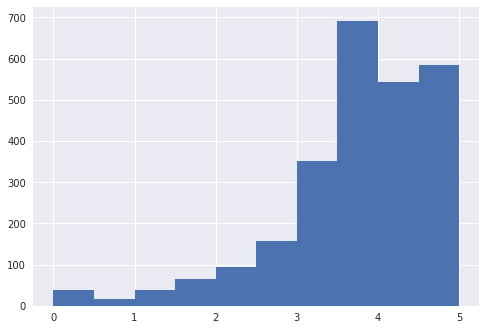

In [4]:
df2.Stars.hist()

/usr/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stars', ylabel='Density'>

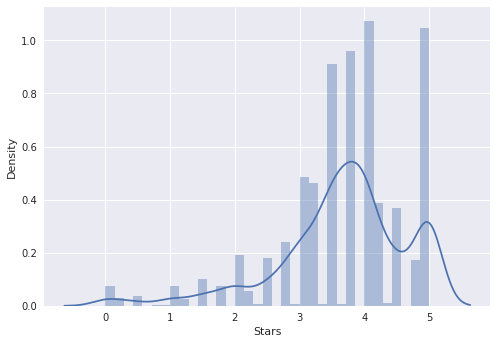

In [5]:
sns.distplot(df2.Stars)

In [6]:
country_size = df.groupby(['Country']).size()

In [7]:
df2['Country'].loc[df2['Country']=="United States"] = 'USA'


/usr/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-7-6b906b88eb92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Country'].loc[df2['Country']=="United States"] = 'USA'


In [8]:
country_list = list(country_size.sort_values(ascending=False).head(10).index)

In [9]:
print(country_list)

['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore']


In [10]:
df2[df2['Country'].isin(country_list)].groupby(['Country','Style'])["Stars"].agg(['size', 'median']).reset_index()

,Country,Style,size,median
0,China,Bowl,45,3.750
1,China,Cup,16,3.375
2,China,Pack,98,3.750
3,China,Tray,9,2.750
4,Hong Kong,Bowl,30,3.750
5,Hong Kong,Cup,38,4.000
6,Hong Kong,Pack,67,4.000
7,Hong Kong,Tray,2,3.625
8,Indonesia,Box,1,4.250
9,Indonesia,Cup,21,4.000


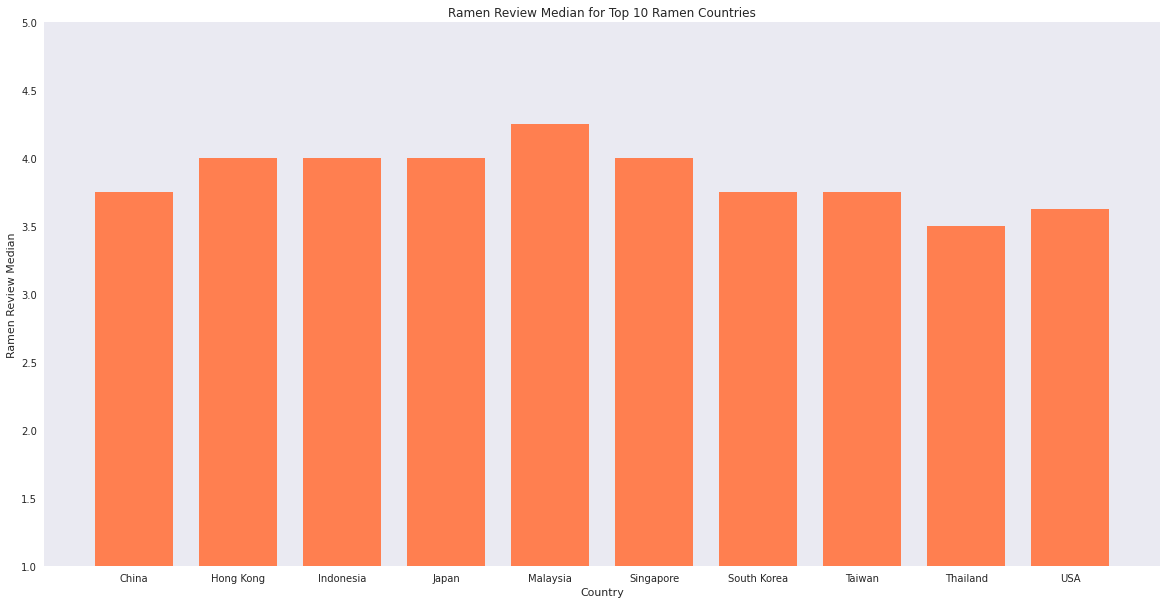

In [11]:
df3 = df2[df2['Country'].isin(country_list)].groupby(['Country'])["Stars"].median()
plt.figure(figsize=(20,10))
plt.grid(zorder=0)
plt.bar(df3.index,df3, color='coral', width=0.75)
plt.xlabel("Country")
plt.ylabel("Ramen Review Median")
plt.title("Ramen Review Median for Top 10 Ramen Countries")
#plt.xticks(rotation='vertical')
plt.ylim(1,5)

plt.show()